In [99]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv(r"C:\Users\Aleyna\Desktop\KAGGLE\playground-series-s3e22\train.csv")

In [101]:
df = pd.DataFrame(df)

In [102]:
df.head(10)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,...,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,...,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,...,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,...,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,...,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [103]:
df.outcome.value_counts().keys().tolist()

['lived', 'died', 'euthanized']

In [123]:
df.outcome.value_counts(normalize=True)

outcome
 1    0.464777
-1    0.331984
 0    0.203239
Name: proportion, dtype: float64

In [104]:
df = df.drop("id", axis=1)

In [105]:
outcome = {
    "died": -1,
    "euthanized": 0,
    "lived": 1
}
df.outcome = df.outcome.map(outcome)

In [106]:
df.outcome

0      -1
1       0
2       1
3       1
4       1
       ..
1230    1
1231   -1
1232    1
1233    1
1234    1
Name: outcome, Length: 1235, dtype: int64

In [107]:
df.hospital_number.value_counts()

hospital_number
529461     46
528548     32
528996     21
5290409    20
529667     20
           ..
532985      1
527526      1
535415      1
5289419     1
530157      1
Name: count, Length: 255, dtype: int64

In [109]:
numeric = []
binary = []
categoric = []
for i in df.columns:
    if df[i].dtypes == "int64" and df[i].nunique() == 2 or df[i].dtypes == "float64" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "object" and df[i].nunique() == 2:
        binary.append(i)
    elif df[i].dtypes == "int64" or df[i].dtypes == "float64":
        numeric.append(i)
    else: 
        categoric.append(i)

In [110]:
numeric = pd.DataFrame(df[numeric])
categoric = pd.DataFrame(df[categoric])
binary = pd.DataFrame(df[binary])

In [113]:
numeric

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,outcome
0,530001,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,-1
1,533836,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,529812,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,1
3,5262541,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,1
4,5299629,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,2.0,57.0,66.0,2.0,2206,0,1
1231,528570,37.5,60.0,50.0,3.0,35.0,6.4,3.6,2209,0,-1
1232,529685,37.5,84.0,40.0,3.0,40.0,5.9,7.0,400,0,1
1233,534784,38.1,70.0,16.0,2.0,58.0,74.0,2.0,2209,0,1


In [114]:
categoric

,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance
0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious
1,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious
2,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,NaN,distend_large,serosanguious
3,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy
4,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...
1230,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,NaN,distend_large,serosanguious
1231,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious
1232,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy
1233,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy


<Axes: >

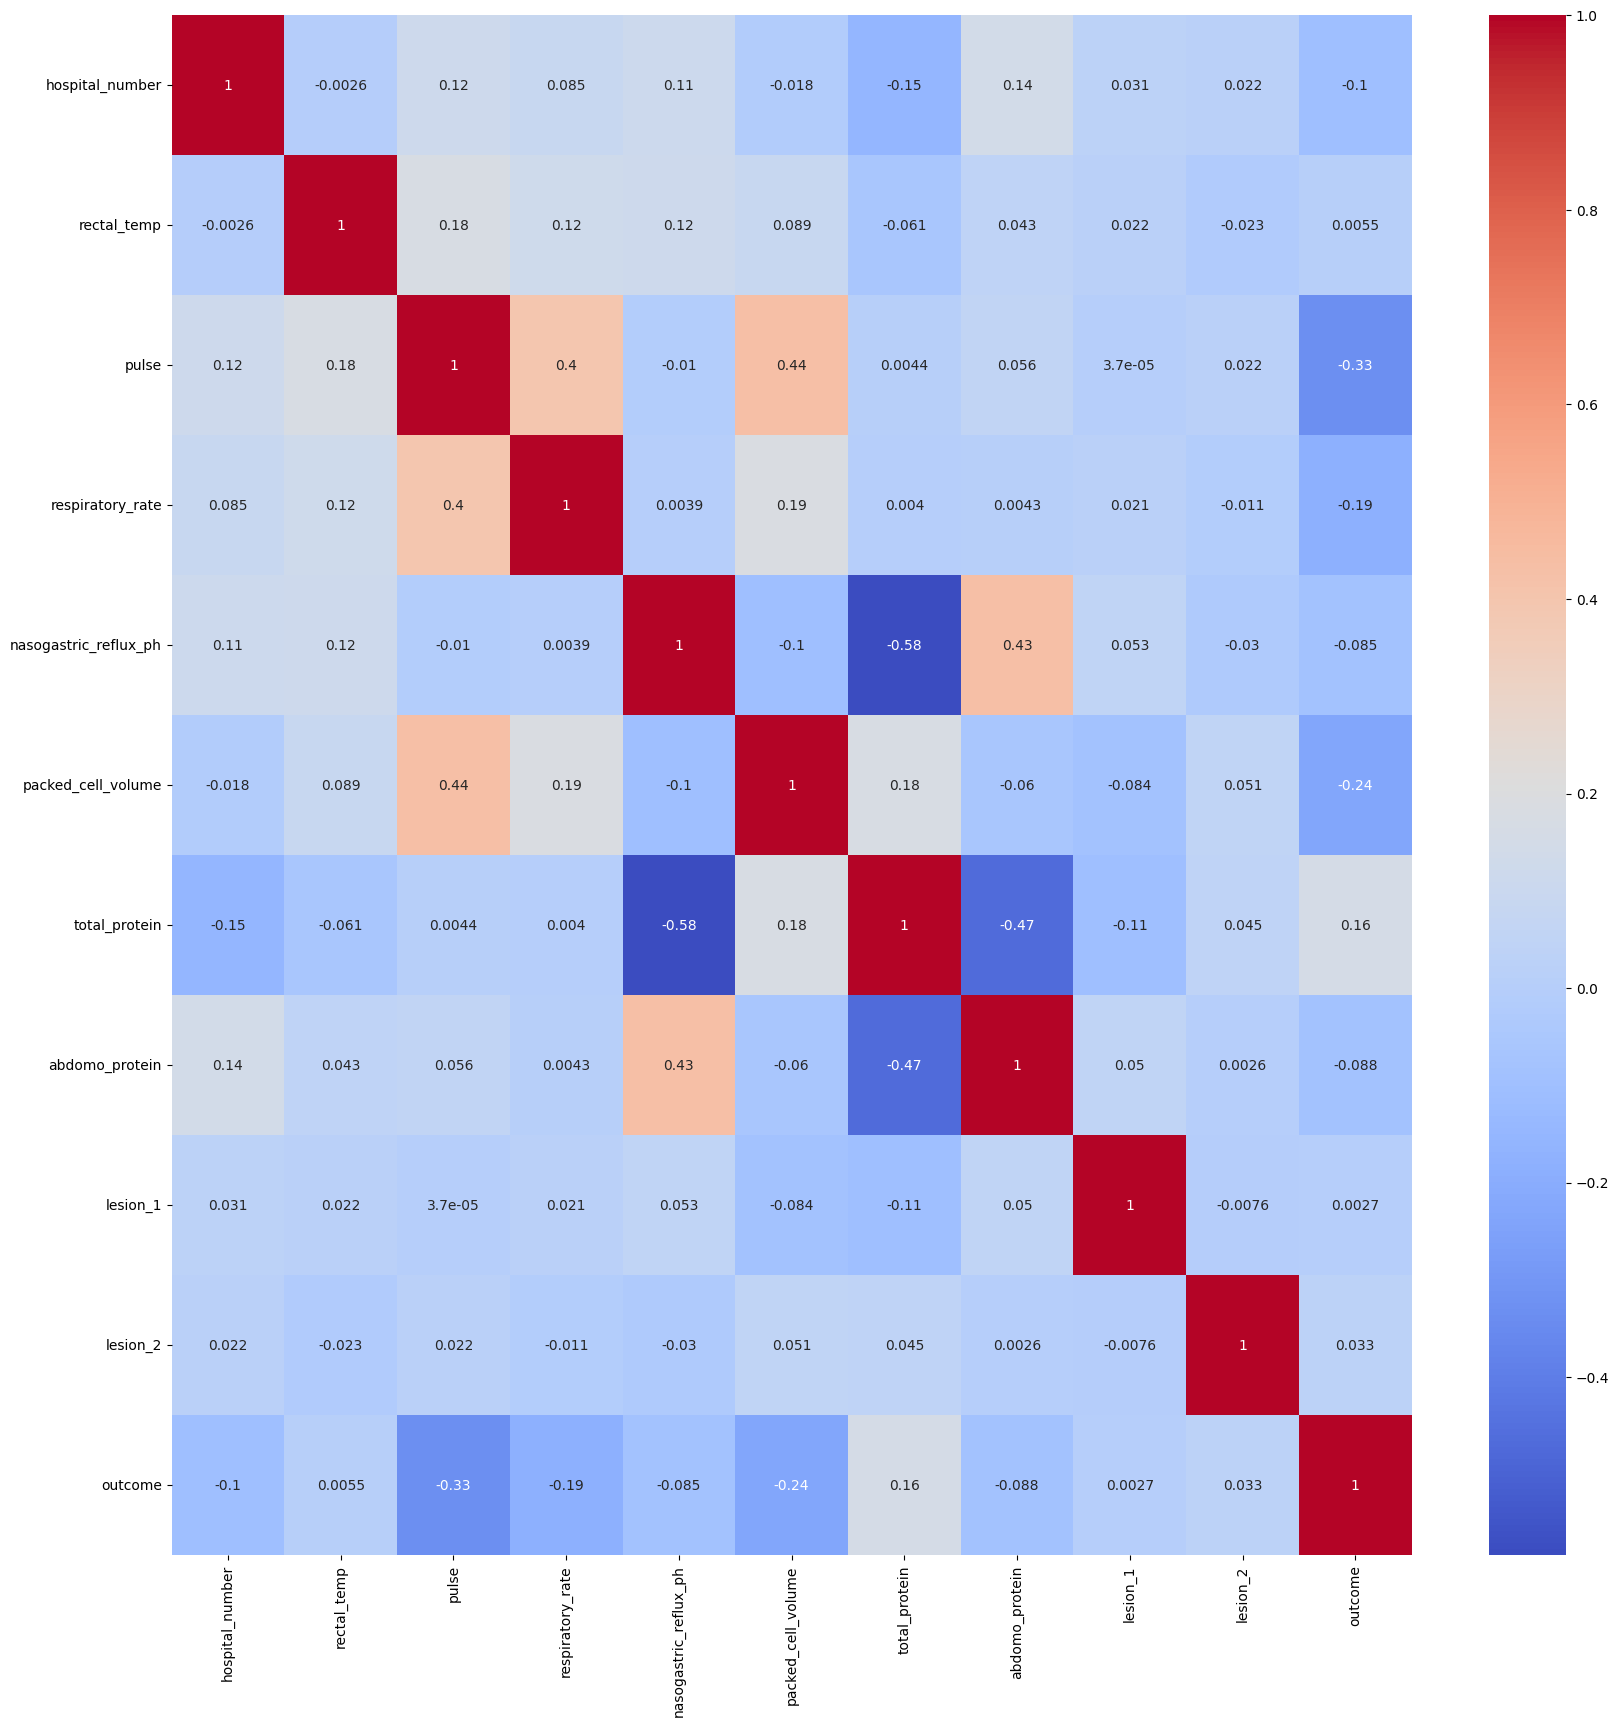

In [116]:
corr = numeric.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [120]:
if numeric["nasogastric_reflux_ph"].std() > numeric["total_protein"].std():
    numeric.drop("total_protein", axis=1, inplace=True)
else:
    numeric.drop("nasogastric_reflux_ph", axis=1, inplace=True)

In [121]:
numeric

,hospital_number,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,outcome
0,530001,38.1,132.0,24.0,57.0,8.5,3.4,2209,0,-1
1,533836,37.5,88.0,12.0,33.0,64.0,2.0,2208,0,0
2,529812,38.3,120.0,28.0,37.0,6.4,3.4,5124,0,1
3,5262541,37.1,72.0,30.0,53.0,7.0,3.9,2208,0,1
4,5299629,38.0,52.0,48.0,47.0,7.3,2.6,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1230,535246,38.5,129.0,48.0,57.0,66.0,2.0,2206,0,1
1231,528570,37.5,60.0,50.0,35.0,6.4,3.6,2209,0,-1
1232,529685,37.5,84.0,40.0,40.0,5.9,7.0,400,0,1
1233,534784,38.1,70.0,16.0,58.0,74.0,2.0,2209,0,1


In [111]:
binary

,surgery,age,surgical_lesion,lesion_3,cp_data
0,yes,adult,yes,0,no
1,yes,adult,yes,0,no
2,yes,adult,yes,0,no
3,yes,adult,yes,0,yes
4,no,adult,no,0,yes
...,...,...,...,...,...
1230,yes,adult,yes,0,no
1231,yes,adult,yes,0,yes
1232,yes,young,yes,0,yes
1233,yes,adult,yes,0,no


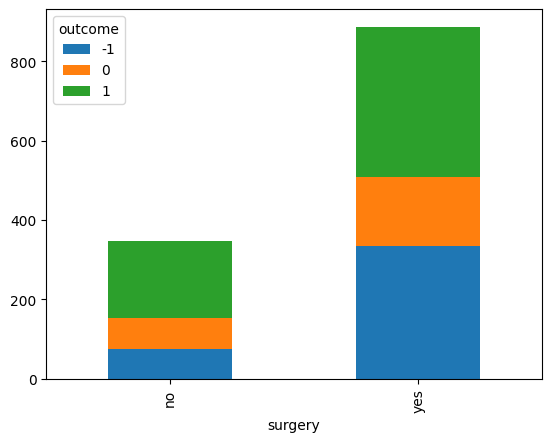

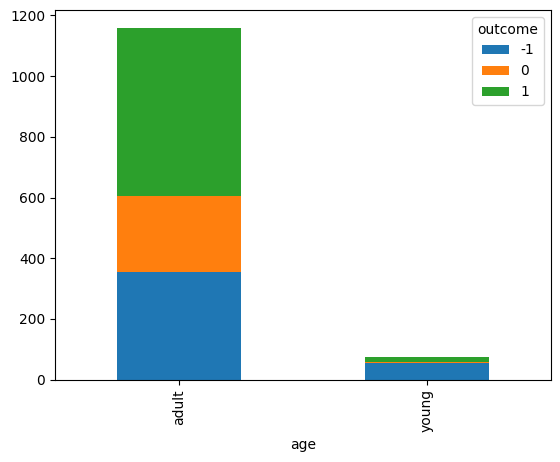

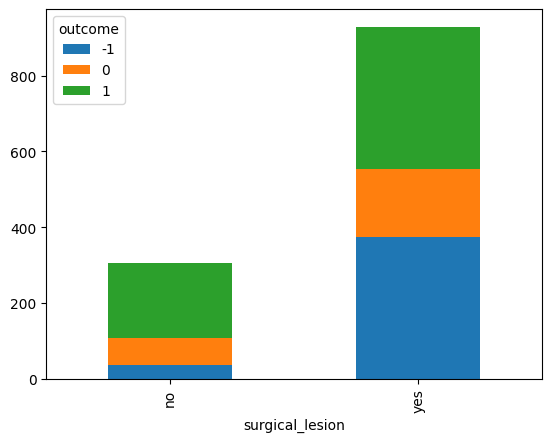

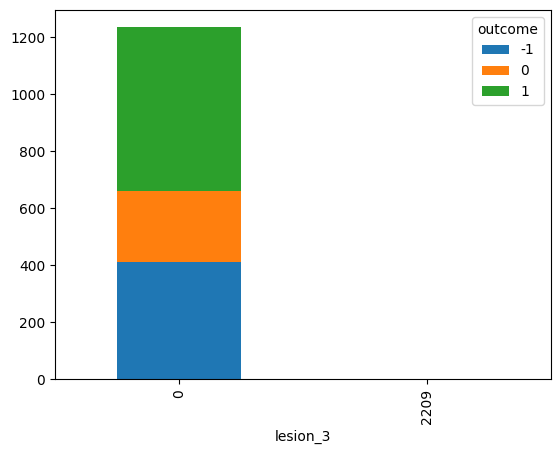

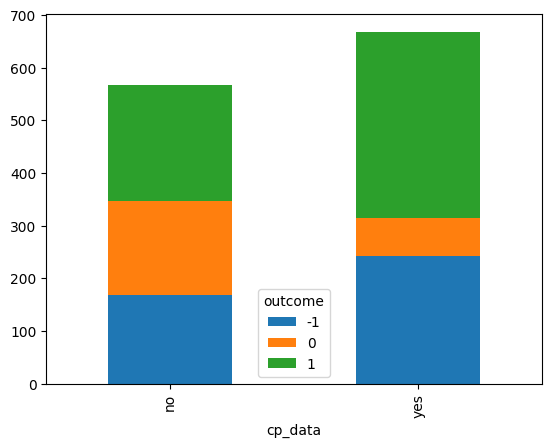

[['surgery', 74, [0, 0]],
 ['surgery', 79, [0, 1]],
 ['surgery', 195, [0, 2]],
 ['surgery', 172, [1, 1]],
 ['age', 248, [0, 1]],
 ['age', 54, [1, 0]],
 ['age', 3, [1, 1]],
 ['age', 18, [1, 2]],
 ['surgical_lesion', 35, [0, 0]],
 ['surgical_lesion', 72, [0, 1]],
 ['surgical_lesion', 199, [0, 2]],
 ['surgical_lesion', 179, [1, 1]],
 ['lesion_3', 0, [1, 0]],
 ['lesion_3', 1, [1, 1]],
 ['lesion_3', 1, [1, 2]],
 ['cp_data', 168, [0, 0]],
 ['cp_data', 178, [0, 1]],
 ['cp_data', 221, [0, 2]],
 ['cp_data', 242, [1, 0]],
 ['cp_data', 73, [1, 1]]]

In [153]:
columns = []
for i in binary.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])

    for b in range(0, 2): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns

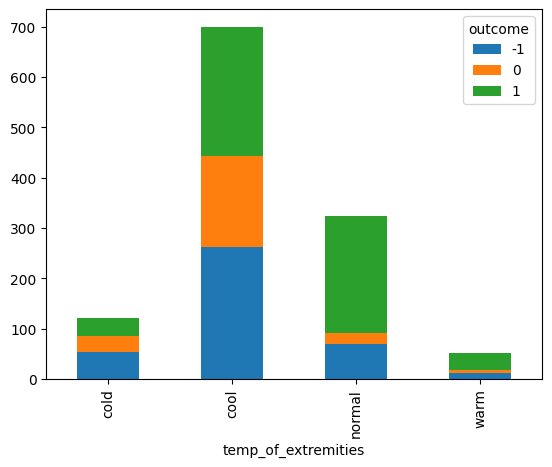

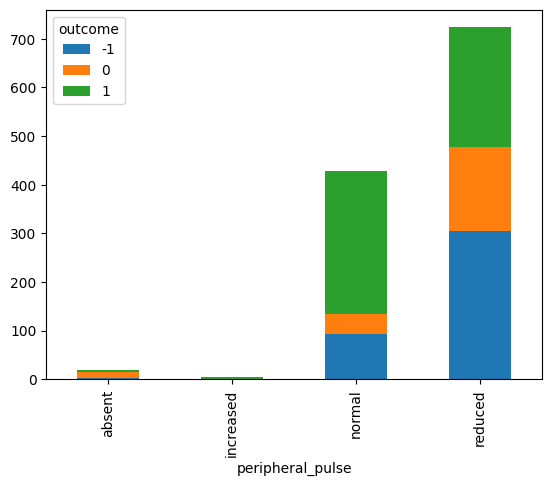

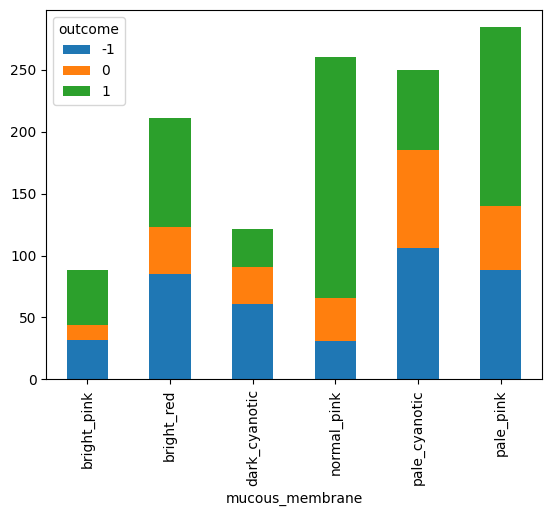

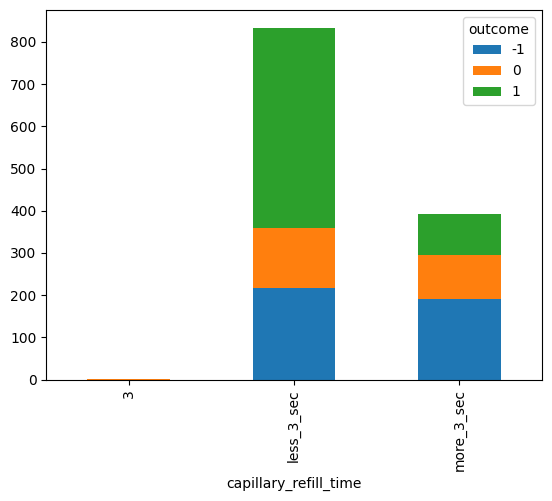

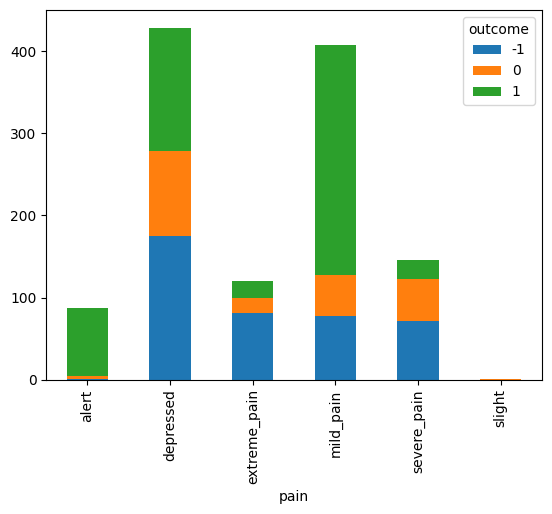

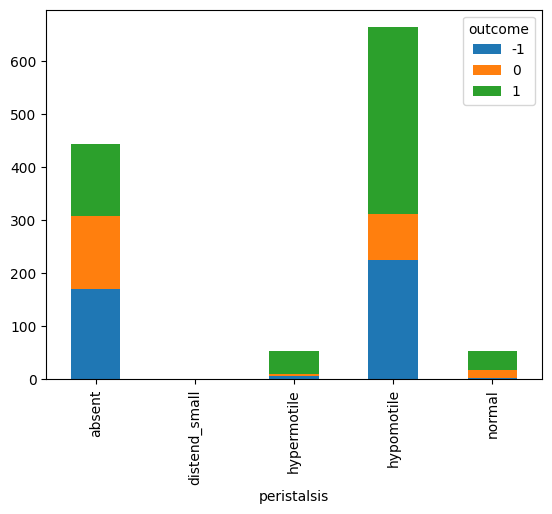

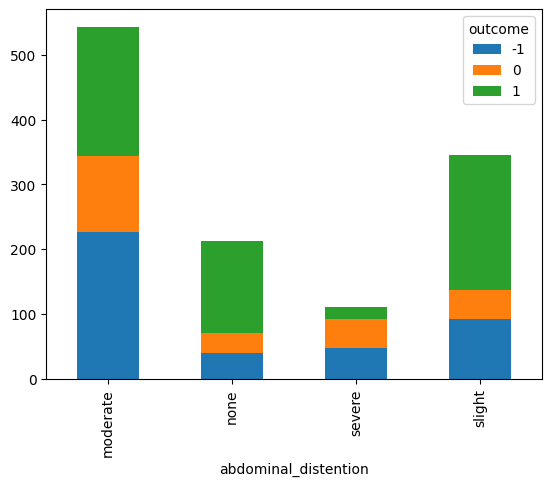

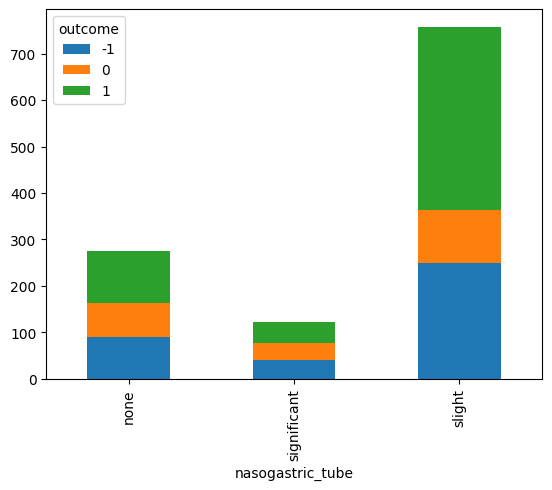

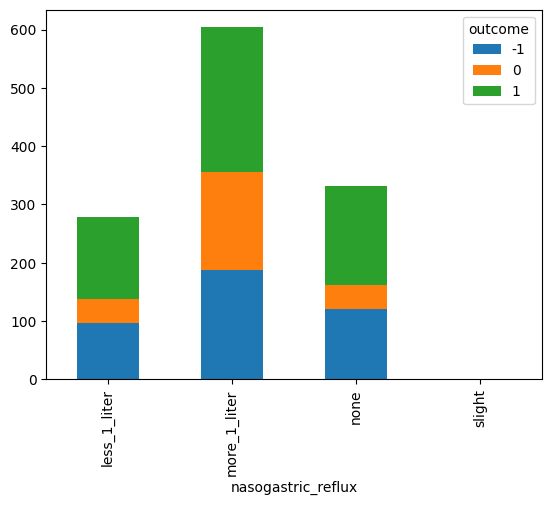

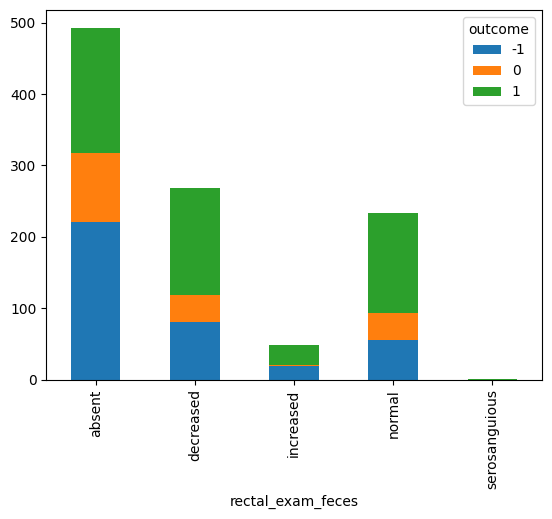

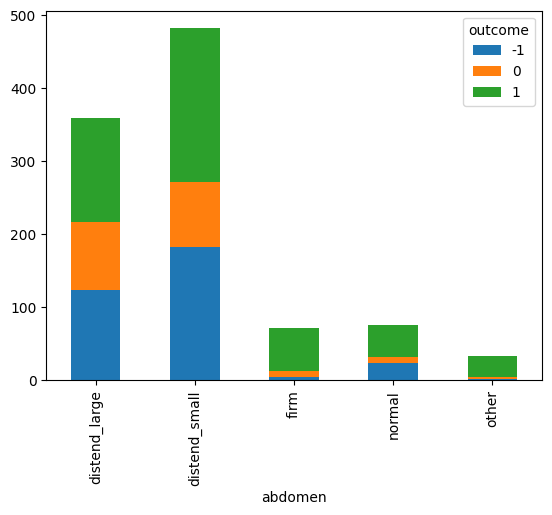

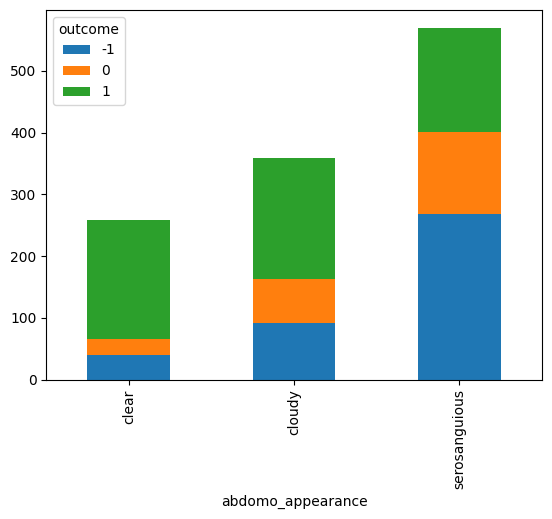

[['temp_of_extremities', 54, [0, 0]],
 ['temp_of_extremities', 31, [0, 1]],
 ['temp_of_extremities', 36, [0, 2]],
 ['temp_of_extremities', 181, [1, 1]],
 ['temp_of_extremities', 70, [2, 0]],
 ['temp_of_extremities', 22, [2, 1]],
 ['temp_of_extremities', 232, [2, 2]],
 ['temp_of_extremities', 12, [3, 0]],
 ['temp_of_extremities', 5, [3, 1]],
 ['temp_of_extremities', 34, [3, 2]],
 ['peripheral_pulse', 3, [0, 0]],
 ['peripheral_pulse', 11, [0, 1]],
 ['peripheral_pulse', 4, [0, 2]],
 ['peripheral_pulse', 1, [1, 0]],
 ['peripheral_pulse', 0, [1, 1]],
 ['peripheral_pulse', 3, [1, 2]],
 ['peripheral_pulse', 92, [2, 0]],
 ['peripheral_pulse', 42, [2, 1]],
 ['peripheral_pulse', 172, [3, 1]],
 ['peripheral_pulse', 247, [3, 2]],
 ['mucous_membrane', 32, [0, 0]],
 ['mucous_membrane', 12, [0, 1]],
 ['mucous_membrane', 44, [0, 2]],
 ['mucous_membrane', 85, [1, 0]],
 ['mucous_membrane', 38, [1, 1]],
 ['mucous_membrane', 88, [1, 2]],
 ['mucous_membrane', 61, [2, 0]],
 ['mucous_membrane', 30, [2, 1]],


In [158]:
columns2 = []
for i in categoric.columns:
    crosstable = pd.crosstab(df[i], df["outcome"])

    for b in range(len(crosstable[0])): #because my crosstable is a 2x2 matrix, i give the range 2 to access rows
            for c in range(0, 3): #same here, this time to access the columns
                value = crosstable.iloc[b,c] #here i access the count of each combo of 1 and 0's. like (0,0), (0,1), (1,0), (1,1)
                if value < 250: #here i want to access those combinations of 1-0 where there is less than 250 of 0 or 1
                    columns2.append([i, value, [b,c]]) #i want to see which columns they belong to and where they are in the crosstable
    crosstable.plot(kind="bar", stacked=True) #here i visualize the crosstables to better look at the problems
    plt.show()
columns2